In [58]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

random_state = 42

In [34]:
ham = pd.read_csv("./datasets/emails-enron.csv")
ham = ham.drop("Unnamed: 0", axis=1)
print("ham shape:", ham.shape)
display(ham.head())

ham shape: (4279, 13)


,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
0,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1,False,0,0,7bit,0,False,False,False,False,False,0,False,0
2,False,0,0,7bit,0,False,False,False,False,False,0,False,0
3,False,0,0,7bit,0,False,False,False,False,False,0,False,0
4,False,0,0,quoted-printable,0,False,False,False,False,False,0,False,0


In [35]:
tamu_ham = pd.read_csv("./datasets/emails-tamu-ham.csv")
tamu_ham = tamu_ham.drop("Unnamed: 0", axis=1)
print("tamu_ham.shape: ", tamu_ham.shape)
display(tamu_ham.head())

tamu_ham.shape:  (6367, 13)


,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
0,False,0,0,none,0,False,True,False,False,False,0,False,0
1,False,0,0,none,0,False,True,False,False,False,0,False,0
2,False,0,0,none,0,False,True,False,False,False,0,False,1
3,False,0,0,none,0,False,True,False,False,False,0,False,10
4,False,0,0,none,0,False,True,False,False,False,0,False,3


In [36]:
spam = pd.read_csv("./datasets/emails-phishing.csv")
spam = spam.drop("Unnamed: 0", axis=1)
print("spam.shape: ", spam.shape)
display(spam.head())


spam.shape:  (2256, 37)


,Phishy,access,account,address,bank,banking,belowthank,click,co,com,...,personal,please,protect,records,security,service,update,user,verify,www
0,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
spam_phishing0 = pd.read_csv("./datasets/phishing0.csv")
# print(spam_phishing0.columns)
print("spam_phishing0.shape: ", spam_phishing0.shape)
spam_phishing0 = spam_phishing0.drop("Unnamed: 0", axis=1)
display(spam_phishing0.head())

spam_phishing0.shape:  (413, 38)


,Phishy,access,account,address,bank,banking,belowthank,click,co,com,...,personal,please,protect,records,security,service,update,user,verify,www
0,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,1,0,0,1,0,0,53,60,54,...,1,1,2,0,0,0,0,3,0,0
3,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
ass_easy_ham = pd.read_csv("./datasets/ass-easy-ham.csv")
# print(spam_phishing0.columns)
print("ass_easy_ham.shape: ", ass_easy_ham.shape)
ass_easy_ham = ass_easy_ham.drop("Unnamed: 0", axis=1)
display(ass_easy_ham.head())

ass_easy_ham.shape:  (2357, 38)


,Phishy,access,account,address,bank,banking,belowthank,click,co,com,...,personal,please,protect,records,security,service,update,user,verify,www
0,False,0,0,0,0,0,0,0,6,2,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
ass_hard_ham = pd.read_csv("./datasets/ass-hard-ham.csv")
# print(spam_phishing0.columns)
print("ass_hard_ham.shape: ", ass_hard_ham.shape)
ass_hard_ham = ass_hard_ham.drop("Unnamed: 0", axis=1)
display(ass_hard_ham.head())

ass_hard_ham.shape:  (216, 38)


,Phishy,access,account,address,bank,banking,belowthank,click,co,com,...,personal,please,protect,records,security,service,update,user,verify,www
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,1,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,0,0,0,0,0,0,3,2,...,0,0,0,0,0,0,0,0,0,0


In [40]:
ass_spam0 = pd.read_csv("./datasets/ass-spam0.csv")
# print(spam_phishing0.columns)
print("ass_spam0.shape: ", ass_spam0.shape)
ass_spam0 = ass_spam0.drop("Unnamed: 0", axis=1)
display(ass_spam0.head())

ass_spam0.shape:  (415, 38)


,Phishy,access,account,address,bank,banking,belowthank,click,co,com,...,personal,please,protect,records,security,service,update,user,verify,www
0,True,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,True,1,0,1,0,0,0,1,9,6,...,0,0,0,0,0,1,0,0,0,3
4,True,0,0,2,0,0,0,0,6,4,...,0,2,0,0,0,0,0,0,0,0


In [75]:
ass_spam2 = pd.read_csv("./datasets/ass-spam2.csv")
# print(spam_phishing0.columns)
print("ass_spam2.shape: ", ass_spam2.shape)
ass_spam2 = ass_spam2.drop("Unnamed: 0", axis=1)
display(ass_spam2.head())

ass_spam2.shape:  (1227, 54)


,@ in URLs,Attachments,Css,Dots in URLs,Encoding,External Resources,Flash content,HTML content,HTTPSinURLs,HTTP_nosecure_inURLs,...,please,protect,records,security,service,thank,update,user,verify,www
0,False,0,0,2.333333,quoted-printable,0,False,True,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,2.000000,8bit,0,False,False,0.0,0.0,...,1,0,0,4,0,0,0,0,0,1
2,False,0,0,0.000000,quoted-printable,0,False,True,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,1.500000,8bit,0,False,False,0.0,0.0,...,6,0,0,2,4,2,0,0,0,0
4,False,0,0,2.750000,8bit,0,False,True,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
small_tamu_ham = pd.read_csv("./datasets/small-emails-tamu-ham-0.csv")
# print(spam_phishing0.columns)
print("small_tamu_ham.shape: ", small_tamu_ham.shape)
small_tamu_ham = small_tamu_ham.drop("Unnamed: 0", axis=1)
display(small_tamu_ham.head())

small_tamu_ham.shape:  (179, 54)


,@ in URLs,Attachments,Css,Dots in URLs,Encoding,External Resources,Flash content,HTML content,HTTPSinURLs,HTTP_nosecure_inURLs,...,please,protect,records,security,service,thank,update,user,verify,www
0,False,0,0,2.142857,none,0,False,True,0.0,1.00,...,2,0,0,0,0,1,0,0,0,0
1,False,0,0,1.888889,none,0,False,True,0.0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,2.200000,none,0,False,True,0.0,0.75,...,2,0,0,0,0,0,0,0,0,0
3,False,0,0,1.484848,none,0,False,True,0.0,0.00,...,0,0,0,0,0,0,0,0,0,1
4,False,0,0,2.000000,none,0,False,True,1.0,0.00,...,0,1,0,1,0,0,0,0,0,0


# Plots

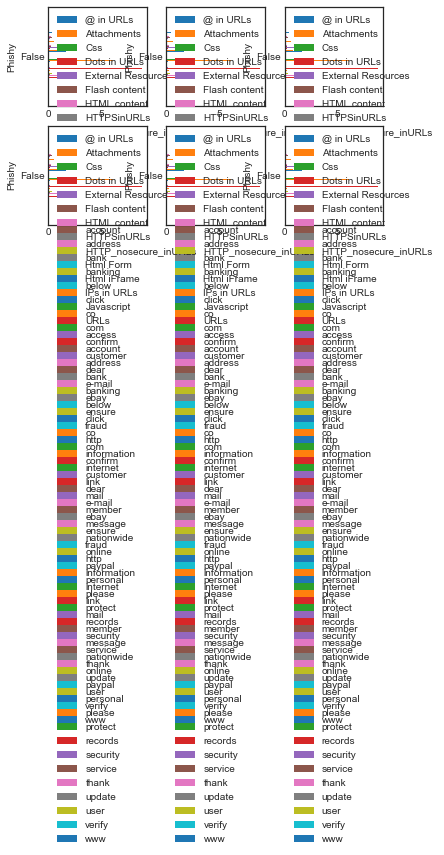

In [65]:
# fig, ax = plt.subplots(2, 3)

# for i in range(2):
#     for j in range(3):
#         combo_group.plot.barh(ax = ax[i, j])
#         ax[i, j].text(0.5, 0.5, str((i, j)),
#                       fontsize=18, ha='center')
        
# fig

combo.shape:  (1406, 53)


,@ in URLs,Attachments,Css
Phishy,,,
False,0.00000,0.078212,0.016760
True,0.00978,0.008150,0.005705


,Dots in URLs,External Resources,Flash content
Phishy,,,
False,2.042262,0.000000,0.00000
True,2.054614,0.000815,0.00163


,HTML content,HTTPSinURLs,HTTP_nosecure_inURLs
Phishy,,,
False,0.955307,0.116854,0.319257
True,0.602282,0.002391,0.393640


,Html Form,Html iFrame,IPs in URLs
Phishy,,,
False,0.000000,0.000000,0.201117
True,0.087205,0.000815,0.225754


,Javascript,URLs,access
Phishy,,,
False,0.027933,8.843575,0.150838
True,0.022005,5.010595,0.114099


,account,address,bank
Phishy,,,
False,0.055866,0.078212,0.033520
True,0.154849,0.400978,0.100244


,banking,below,click
Phishy,,,
False,0.011173,0.089385,0.150838
True,0.008965,0.191524,0.300733


,co,com,confirm
Phishy,,,
False,6.067039,2.497207,0.01676
True,4.002445,1.850041,0.03423


,customer,dear,e-mail
Phishy,,,
False,0.005587,0.039106,0.039106
True,0.076610,0.055420,0.369193


,ebay,ensure,fraud
Phishy,,,
False,0.000000,0.039106,0.005587
True,0.018745,0.008150,0.017115


,http,information,internet
Phishy,,,
False,1.670391,0.798883,0.011173
True,0.807661,0.301548,0.227384


,link,mail,member
Phishy,,,
False,0.178771,1.162011,0.206704
True,0.126324,1.678077,0.149959


,message,nationwide,online
Phishy,,,
False,0.212291,0.000000,0.050279
True,0.096170,0.004075,0.092095


,paypal,personal,please
Phishy,,,
False,0.000000,0.083799,0.569832
True,0.036675,0.083130,0.440913


,protect,records,security
Phishy,,,
False,0.061453,0.011173,0.117318
True,0.049715,0.015485,0.068460


,service,thank,update
Phishy,,,
False,0.318436,0.212291,0.039106
True,0.239609,0.117359,0.016300


,user,verify,www
Phishy,,,
False,0.039106,0.000000,0.385475
True,0.057050,0.007335,0.441728


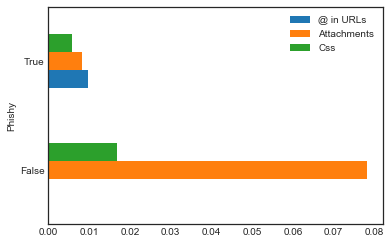

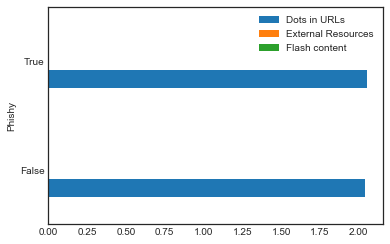

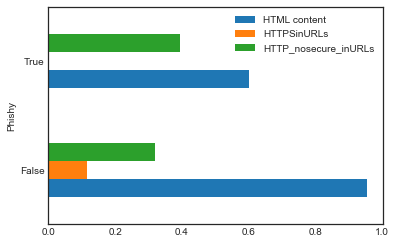

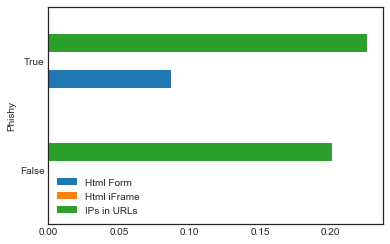

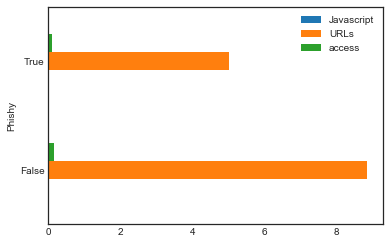

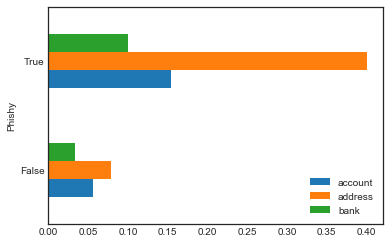

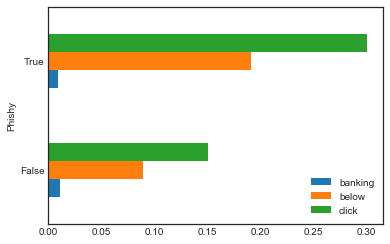

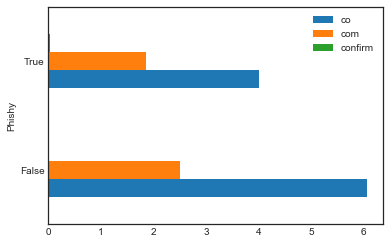

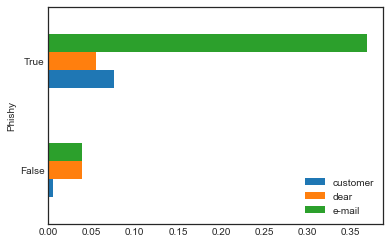

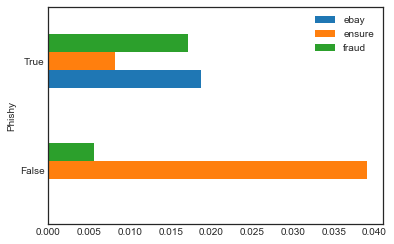

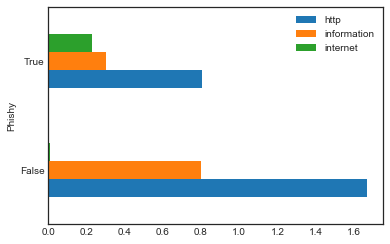

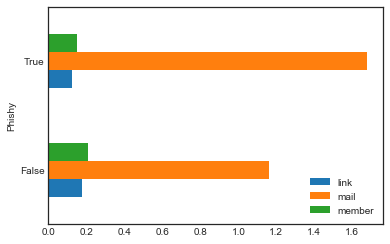

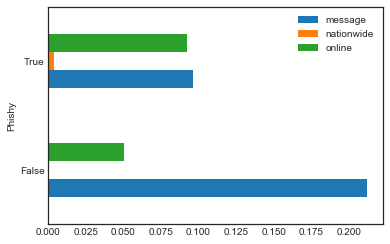

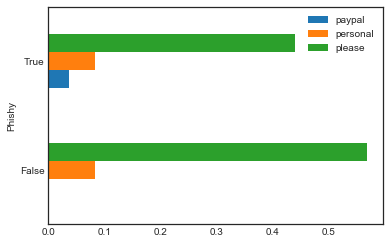

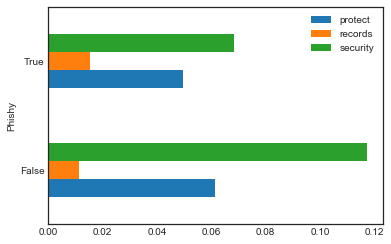

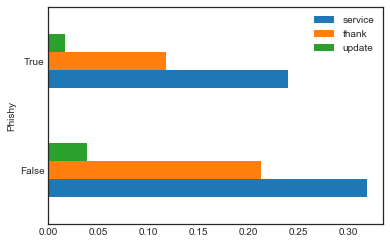

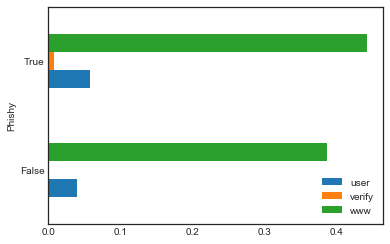

In [70]:

combo = pd.concat([small_tamu_ham, ass_spam2])
# urls = combo["URLs"]
print("combo.shape: ", combo.shape)
combo_group = combo.groupby(['Phishy']).mean()
# combo_group = combo_group.iloc[:, :3]

steps = 3
for i in range(0, len(combo_group.columns), steps):
    a_group = combo_group.iloc[:, i:i+steps]

# combo_group = combo_group.drop(columns="")
    display(a_group.head())
    ax = a_group.plot.barh()
#     ax.set_xlim([0,.5])
    display(ax)

# Get X and y, before test/train split

In [77]:


# X = pd.concat([spam, tamu_ham, spam_phishing0, ass_easy_ham, ass_hard_ham, ass_spam0, ass_spam2])
X = pd.concat([small_tamu_ham, ass_spam2])
y = X["Phishy"] 

X = X.drop("Phishy", axis=1)
if "id" in X.columns:
    X = X.drop("id", axis=1)

print("X: ", X.shape, " y: ", y.shape)
display(X.head())

y.head()
print("datatypes X \n{0} \ny \n{1}".format(X.dtypes, y.dtypes))

dEncoding = {}
i = 0
for enc in X["Encoding"].unique():
    dEncoding[enc] = i
    i+=1




X:  (1406, 52)  y:  (1406,)


,@ in URLs,Attachments,Css,Dots in URLs,Encoding,External Resources,Flash content,HTML content,HTTPSinURLs,HTTP_nosecure_inURLs,...,please,protect,records,security,service,thank,update,user,verify,www
0,False,0,0,2.142857,none,0,False,True,0.0,1.00,...,2,0,0,0,0,1,0,0,0,0
1,False,0,0,1.888889,none,0,False,True,0.0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,2.200000,none,0,False,True,0.0,0.75,...,2,0,0,0,0,0,0,0,0,0
3,False,0,0,1.484848,none,0,False,True,0.0,0.00,...,0,0,0,0,0,0,0,0,0,1
4,False,0,0,2.000000,none,0,False,True,1.0,0.00,...,0,1,0,1,0,0,0,0,0,0


datatypes X 
@ in URLs                  bool
Attachments               int64
Css                       int64
Dots in URLs            float64
Encoding                 object
External Resources        int64
Flash content              bool
HTML content               bool
HTTPSinURLs             float64
HTTP_nosecure_inURLs    float64
Html Form                  bool
Html iFrame                bool
IPs in URLs                bool
Javascript                int64
URLs                      int64
access                    int64
account                   int64
address                   int64
bank                      int64
banking                   int64
below                     int64
click                     int64
co                        int64
com                       int64
confirm                   int64
customer                  int64
dear                      int64
e-mail                    int64
ebay                      int64
ensure                    int64
fraud                     i

# clean up 'Encoding' column

In [78]:
X = X.replace({"Encoding": dEncoding})
X["Encoding"].unique()



array([0, 1, 2, 3, 4, 5])

# Split into train and test

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,@ in URLs,Attachments,Css,Dots in URLs,Encoding,External Resources,Flash content,HTML content,HTTPSinURLs,HTTP_nosecure_inURLs,...,please,protect,records,security,service,thank,update,user,verify,www
1132,False,0,0,0.000000,0,0,False,True,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
591,False,0,0,0.000000,2,0,False,True,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
451,False,0,0,1.666667,3,0,False,False,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
850,False,0,0,2.000000,0,0,False,True,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1126,False,0,0,0.000000,3,0,False,False,0.0,0.0,...,1,0,0,0,3,1,0,0,0,0


1132    True
591     True
451     True
850     True
1126    True
Name: Phishy, dtype: bool

,@ in URLs,Attachments,Css,Dots in URLs,Encoding,External Resources,Flash content,HTML content,HTTPSinURLs,HTTP_nosecure_inURLs,...,please,protect,records,security,service,thank,update,user,verify,www
896,False,0,0,0.0,3,0,False,False,0.0,0.0,...,2,0,0,0,0,0,0,0,0,0
836,False,0,0,2.0,0,0,False,True,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
471,False,0,0,2.0,0,0,False,False,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
268,False,0,0,1.0,4,0,False,False,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1111,False,0,0,2.0,2,0,False,True,0.0,0.5,...,0,0,0,0,0,0,0,0,0,0


896     True
836     True
471     True
268     True
1111    True
Name: Phishy, dtype: bool

# Hyperparameter Tuning

In [80]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2010, num = 20)]
n_estimators = np.arange(100, 2000, 100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(1, 50, 2)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
# bound = 5000
# rf_random.fit(X_train[:bound], y_train[:bound])
rf_random.fit(X_train, y_train)

print("best est   : ", rf_random.best_estimator_)
print("best params: ", rf_random.best_params_)
print("best score : ", rf_random.best_score_)

{'bootstrap': [True, False],
 'max_depth': [1,
               3,
               5,
               7,
               9,
               11,
               13,
               15,
               17,
               19,
               21,
               23,
               25,
               27,
               29,
               31,
               33,
               35,
               37,
               39,
               41,
               43,
               45,
               47,
               49],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.5min finished


best est   :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=31, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best params:  {'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 31, 'bootstrap': True}
best score :  0.9522292993630573


# Model w tuning

In [81]:
rf_tuned = rf_random.best_estimator_

In [82]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=31, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
rf_tuned.score(X_test,y_test)

0.959051724137931

In [84]:
from sklearn.metrics import classification_report
print(classification_report(rf_tuned.predict(X_test), y_test, digits=5))

              precision    recall  f1-score   support

       False    0.74468   0.83333   0.78652        42
        True    0.98321   0.97156   0.97735       422

    accuracy                        0.95905       464
   macro avg    0.86395   0.90245   0.88194       464
weighted avg    0.96162   0.95905   0.96008       464



# Model w/o tuning

In [136]:
rf_notuned = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=random_state)

In [137]:
rf_notuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [138]:
rf_notuned.score(X_test, y_test)

0.8430154012429073

# Tuned Model Results

In [85]:
from sklearn.metrics import confusion_matrix
y_pred = rf_tuned.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# precision - what proportion of flagged phishing emails were truely phishing?
precision = tp / (tp + fp)
# recall - how many of the phishing emails were correctly identified?
recall = tp / (tp + fn)
# f1 statistic - combination of precision and recall
f1 = 2 * precision * recall / (precision + recall)
# accuracy - what proportion were identified correctly
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("precision                              [tp / (tp + fp)] = %f" % precision)
print("recall                                 [tp / (tp + fn)] = %f" % recall)
print("f1        2 * precision * recall / (precision + recall) = %f" % f1)
print("accuracy                 (tp +tn) / (tp + tn + fp + fn) = %f" % accuracy)

# print(len(y_pred))
# print(conf_mat)
# conf_mat / len(y_pred)

precision                              [tp / (tp + fp)] = 0.971564
recall                                 [tp / (tp + fn)] = 0.983213
f1        2 * precision * recall / (precision + recall) = 0.977354
accuracy                 (tp +tn) / (tp + tn + fp + fn) = 0.959052


# Save Model

In [87]:
from joblib import dump, load
model_filename = "RandomForestModel.dat"
best_params_filename = "RandomForestModel.params"
dump(rf_tuned, model_filename)
dump(rf_random.best_params_, best_params_filename)

dump(dEncoding, "encoding.dat")



['encoding.dat']

# Load Model 

In [88]:
rf_tuned_saved = load(model_filename)
y_pred_saved = rf_tuned_saved.predict(X_test)

display(sum(y_pred != y_pred_saved))

rf_tuned_best_params = load(best_params_filename)
print("best_params: ", rf_tuned_best_params)

0

best_params:  {'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 31, 'bootstrap': True}
